<a href="https://www.kaggle.com/code/francescoliveras/sexism-comment-eda-and-model-en-es?scriptVersionId=208602856" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">Sexist detector model and EDA</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>
​
**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>
​
**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.
​
A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

The dataset contains categorical information associated with texts and tags related to content analysis. The data are distributed in different files representing different stages of the machine learning process: training, validation and testing. Each row represents a single entry with the following fields:

* rewire_id: Unique identifier for each entry in the dataset.
* text: Associated text, which may include sentences, paragraphs or other forms of textual content.
* label_sexist: Categorical label indicating whether the text contains sexist content.
* label_category: Subcategory that provides additional information about the type of labeled content.
* label_vector: Vector representation or advanced categorization of the labels.
  
This dataset is useful for text classification projects, bias detection, and development of machine learning models focused on language evaluation.

Purpose:
The main purpose is to analyze and classify texts based on their content. This dataset could be used to train supervised models that address inclusive language and bias detection problems.

| Name            | Data Type       | Has Nulls   | Categorical/Continuous | Description          | Units |
|------------------|-----------------|-------------|-------------------------|----------------------|-------|
| rewire_id        | object          | False       | Categorical            | rewire_id data       | N/A   |
| text             | object          | False       | Categorical            | text data            | N/A   |
| label_sexist     | object          | False       | Categorical            | label_sexist data    | N/A   |
| label_category   | object          | False       | Categorical            | label_category data  | N/A   |
| label_vector     | object          | False       | Categorical            | label_vector data    | N/A   |

**🟥ES**:

El conjunto de datos contiene información categórica asociada a textos y etiquetas relacionadas con el análisis de contenido. Los datos están distribuidos en diferentes archivos que representan distintas etapas del proceso de aprendizaje automático: entrenamiento, validación y prueba. Cada fila representa una entrada única con los siguientes campos:

* rewire_id: Identificador único para cada entrada en el conjunto de datos.
* text: Texto asociado, que puede incluir oraciones, párrafos u otras formas de contenido textual.
* label_sexist: Etiqueta categórica que indica si el texto tiene contenido sexista.
* label_category: Subcategoría que proporciona información adicional sobre el tipo de contenido etiquetado.
* label_vector: Representación vectorial o categorización avanzada de las etiquetas.
  
Este conjunto de datos es útil para proyectos de clasificación de texto, detección de sesgos y desarrollo de modelos de aprendizaje automático enfocados en la evaluación del lenguaje.

Propósito:
El propósito principal es analizar y clasificar textos en función de su contenido. Este conjunto de datos podría ser utilizado para entrenar modelos supervisados que aborden problemas de lenguaje inclusivo y detección de sesgos.

| Name            | Data Type       | Has Nulls   | Categorical/Continuous | Description          | Units |
|------------------|-----------------|-------------|-------------------------|----------------------|-------|
| rewire_id        | object          | False       | Categorical            | rewire_id data       | N/A   |
| text             | object          | False       | Categorical            | text data            | N/A   |
| label_sexist     | object          | False       | Categorical            | label_sexist data    | N/A   |
| label_category   | object          | False       | Categorical            | label_category data  | N/A   |
| label_vector     | object          | False       | Categorical            | label_vector data    | N/A   |

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
import os 
import re
import gc
import sys
import math
import time
import random
import warnings
import datetime
import numpy as np 
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

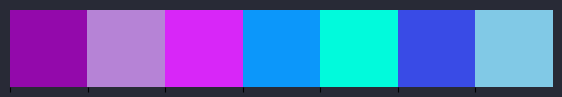

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

warnings.filterwarnings('ignore')

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/sexism-detection-in-english-texts"
DEV_FILE = "dev.csv"
TEST_FILENAME = "test (1).csv"
TRAIN_FILENAME = "train (2).csv"

DEV_DIR = os.path.join(PATH, DEV_FILE)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME) 
TEST_DIR = os.path.join(PATH, TEST_FILENAME)

In [5]:
TARGET = ""